In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
#reading csv file
df = pd.read_csv('C:/Users/Chinmayee/Music/heart_disease.csv')
df = df.dropna()
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['target'], axis=1))
print(X)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)
print(labels)

[0 1 1 ... 1 0 1]


In [34]:
labeled_data = pd.DataFrame({'patient_id': df.index, 'Label': labels})
print(labeled_data.head())
# print(labeled_data['Label'])

   patient_id  Label
0           0      0
1           1      1
2           2      1
3           3      0
4           4      1


In [7]:
df['cluster'] = kmeans.labels_

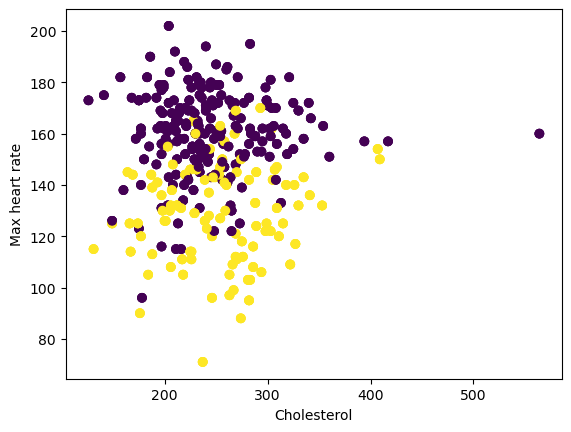

In [8]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df['chol'], df['thalach'], c=df['cluster'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.show()

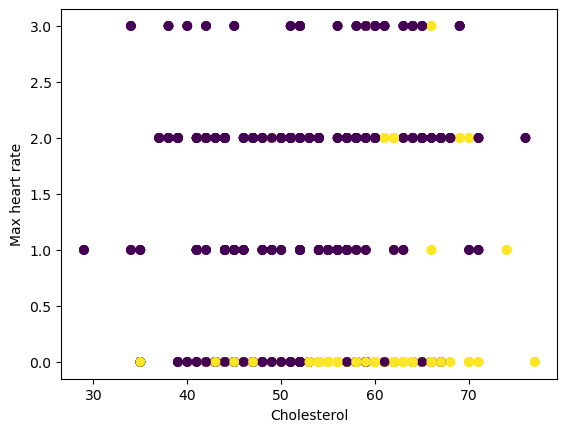

In [9]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['cp'], c=df['cluster'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.show()

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['X'], df['y'], c=df['cluster'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('y')
plt.show()





KeyError: 'X'

## Supervised Learning

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [22]:
# Separating the target variable from the features
X = heart_data.drop('target', axis=1)
y = heart_data['target']

NameError: name 'heart_data' is not defined

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), labeled_data.drop(['patient_id'],axis=1), test_size=0.2, random_state=0)
# print(X_train.columns)
# print(X_test.head(2))
print(y_train)
# print(y_test.head(2))
# Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

      Label
315       0
204       0
363       0
5         0
1017      1
...     ...
835       0
192       0
629       0
559       1
684       0

[820 rows x 1 columns]


In [43]:
# rfc = RandomForestClassifier(n_estimators=100, random_state=0)
# rfc.fit(X_train, y_train)
## Building and training different models
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

neural_network = MLPClassifier(random_state=42)
neural_network.fit(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_train, y_train)

c:\Users\Chinmayee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chinmayee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chinmayee\AppData\Local\Temp\ipykernel_25104\1236410369.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# y_pred = rfc.predict(X_test)
# Predicting the target variable on the testing set and calculating the accuracy
decision_tree_pred = decision_tree.predict(X_test)
neural_network_pred = neural_network.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.show()

NameError: name 'rfc' is not defined

In [40]:
# Comparing the accuracy of different models
from sklearn.metrics import accuracy_score
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
neural_network_acc = accuracy_score(y_test, neural_network_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
# Comparing the accuracy of different models
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_acc * 100))
print('Neural Network Accuracy: {:.2f}%'.format(neural_network_acc * 100))
print('Random Forest Accuracy: {:.2f}%'.format(random_forest_acc * 100))

Decision Tree Accuracy: 100.00%
Neural Network Accuracy: 100.00%
Random Forest Accuracy: 100.00%


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


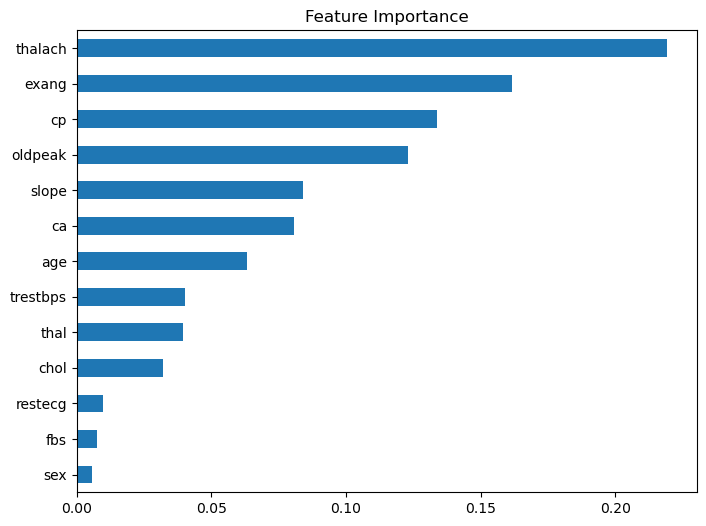

In [16]:
importances = pd.Series(rfc.feature_importances_, index=df.drop(['target'], axis=1).columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.show()